### 1. Load the data 

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [2]:
lfw_people = fetch_lfw_people()

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [3]:
print(n_samples, h, w)

13233 62 47


5


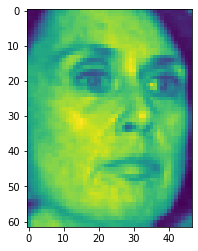

6


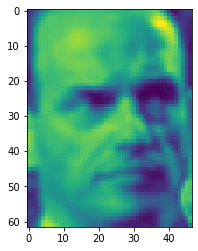

7


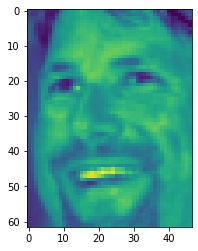

8


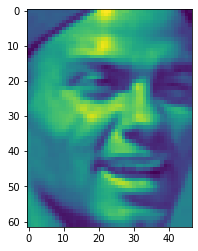

9


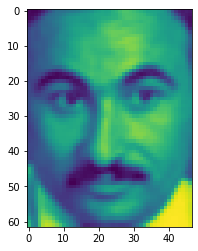

In [4]:
for i in range(5,10):
  print(i)
  plt.imshow(lfw_people.images[i])
  plt.show()

In [5]:
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 13233
n_features: 2914
n_classes: 5749


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
n_components = 10
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

Extracting the top 10 eigenfaces from 9924 faces


In [7]:
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

print(pca.components_)

[[-0.00998928 -0.01073224 -0.01165613 ... -0.00595698 -0.00446508
  -0.0030507 ]
 [-0.01743532 -0.01754864 -0.01818271 ...  0.02897077  0.02671152
   0.02475644]
 [ 0.0332382   0.03487289  0.03754347 ...  0.0214677   0.02081417
   0.0195243 ]
 ...
 [ 0.00078574  0.00070777 -0.00029164 ... -0.01459394 -0.02085883
  -0.0238451 ]
 [ 0.04596303  0.04448619  0.04309147 ... -0.01059166 -0.00461343
  -0.00105171]
 [ 0.0207647   0.02369423  0.0283052  ... -0.03781935 -0.04730996
  -0.05040196]]


In [8]:
eigenfaces = pca.components_.reshape((n_components, h, w))

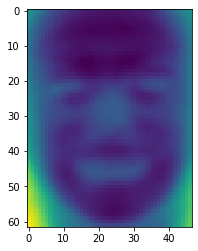

In [9]:
plt.imshow(eigenfaces[0])

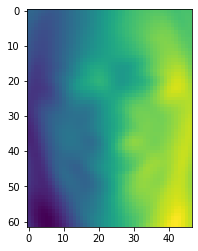

In [10]:
plt.imshow(eigenfaces[1])

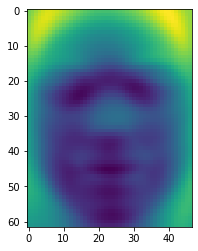

In [11]:
plt.imshow(eigenfaces[2])

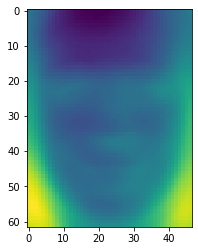

In [12]:
plt.imshow(eigenfaces[3])

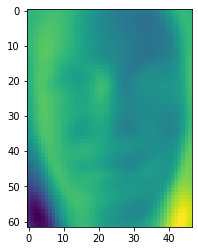

In [13]:
plt.imshow(eigenfaces[4])

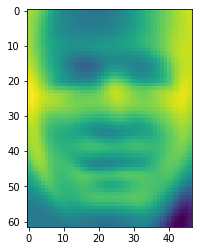

In [14]:
plt.imshow(eigenfaces[5])

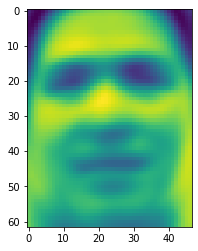

In [15]:
plt.imshow(eigenfaces[6])

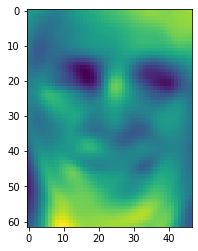

In [16]:
plt.imshow(eigenfaces[7])

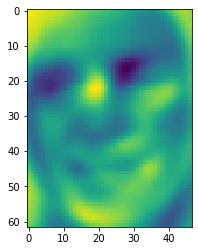

In [17]:
plt.imshow(eigenfaces[8])

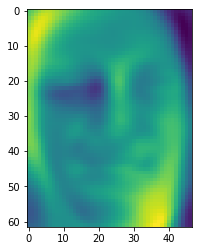

In [18]:
plt.imshow(eigenfaces[9])

### 3. Plot the variance explained by the principal components

In [19]:
n_components = 180
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

Extracting the top 180 eigenfaces from 9924 faces


In [20]:
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

print(pca.components_)

[[-9.9893156e-03 -1.0732221e-02 -1.1656116e-02 ... -5.9570195e-03
  -4.4651274e-03 -3.0507373e-03]
 [-1.7435536e-02 -1.7548608e-02 -1.8182699e-02 ...  2.8970746e-02
   2.6711499e-02  2.4756419e-02]
 [ 3.3238828e-02  3.4873061e-02  3.7543334e-02 ...  2.1467755e-02
   2.0814223e-02  1.9524354e-02]
 ...
 [ 5.4925261e-03 -1.9505966e-05  3.0607707e-03 ...  3.2311808e-02
   2.5843026e-02  1.7830947e-02]
 [ 1.3831655e-02  1.9577455e-02  2.5195815e-02 ... -4.8225589e-02
  -3.6295116e-02 -2.7974837e-02]
 [-2.0378089e-02 -1.6242806e-02 -8.8643925e-03 ...  3.2168366e-02
   1.1261065e-02 -1.6529288e-02]]


In [21]:
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)


Projecting the input data on the eigenfaces orthonormal basis
[0.23290303 0.10654845 0.08250791 0.06951937 0.03280108 0.03054645
 0.02119534 0.01832206 0.01780237 0.01589495 0.01478214 0.01351541
 0.01254422 0.01157881 0.01074321 0.00964631 0.0087905  0.00774071
 0.00768659 0.00686043 0.00669616 0.00625716 0.00589894 0.00530517
 0.00519275 0.00504477 0.00486475 0.00465888 0.00439728 0.00413579
 0.00391205 0.00386408 0.00364713 0.00359512 0.00346122 0.00328029
 0.00318958 0.00301454 0.00295925 0.00289109 0.00285117 0.00267204
 0.0025794  0.00255274 0.00247782 0.00241481 0.00240024 0.00237971
 0.00231432 0.00220313 0.00217341 0.00212425 0.00204164 0.00201794
 0.00197805 0.00188175 0.00185373 0.00180724 0.00178668 0.00174211
 0.00171463 0.00167137 0.00162874 0.00160747 0.00156657 0.00150699
 0.00147021 0.0014652  0.00141527 0.00139221 0.00136015 0.0013453
 0.0013319  0.00131025 0.00128312 0.00127116 0.00124127 0.00122885
 0.00120352 0.00118211 0.0011575  0.00113001 0.0011231  0.00108485
 

**Conclusion :**   23% of the dataset’s variance lies along the first axis, 10% lies along second axis and so on. 

[0.23290303 0.3394515  0.4219594  0.49147877 0.52427983 0.55482626
 0.5760216  0.59434366 0.612146   0.62804097 0.6428231  0.6563385
 0.6688827  0.6804615  0.6912047  0.700851   0.7096415  0.71738225
 0.72506887 0.7319293  0.73862547 0.74488264 0.7507816  0.75608677
 0.7612795  0.7663243  0.77118903 0.7758479  0.7802452  0.784381
 0.788293   0.79215705 0.7958042  0.7993993  0.80286056 0.80614084
 0.8093304  0.81234497 0.8153042  0.81819534 0.82104653 0.82371855
 0.82629794 0.8288507  0.8313285  0.83374333 0.83614355 0.83852327
 0.8408376  0.8430407  0.8452141  0.8473384  0.84938    0.85139793
 0.853376   0.8552577  0.8571114  0.8589186  0.8607053  0.86244744
 0.8641621  0.86583346 0.8674622  0.8690697  0.8706363  0.87214327
 0.8736135  0.8750787  0.87649393 0.8778861  0.8792463  0.8805916
 0.8819235  0.8832337  0.88451684 0.885788   0.8870293  0.88825816
 0.8894617  0.8906438  0.8918013  0.8929313  0.89405435 0.8951392
 0.8962093  0.8972621  0.89830893 0.8993218  0.90032905 0.90132207


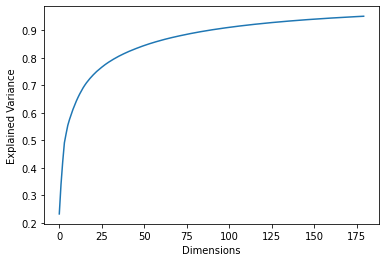

In [22]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

plt.plot(cumsum)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.show()

In [23]:
#Number of components needed to retain 95% of the variance
for i,v in enumerate(cumsum):
  if v >= 0.95:
    print("No. of components =", i)
    break

No. of components = 175


### Reconstruct faces using the first k principal components

In [24]:
any3_faces = X[:3]

(3, 2914)
For k =  5 



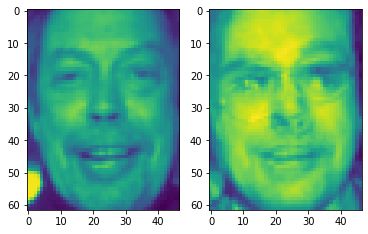

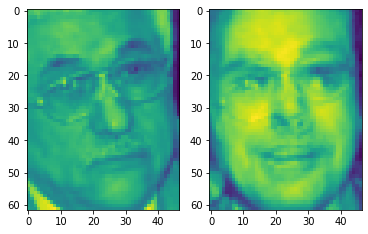

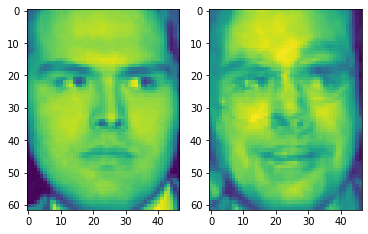

(3, 2914)
For k =  10 



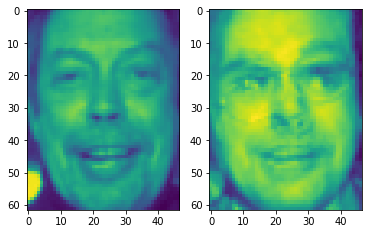

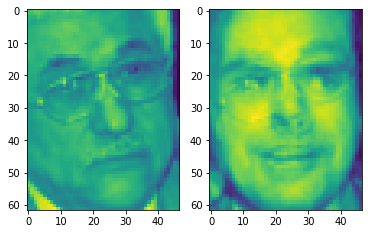

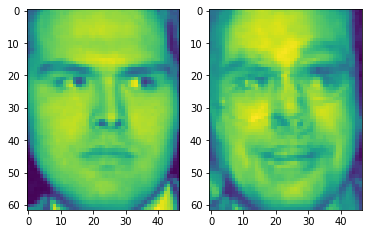

(3, 2914)
For k =  50 



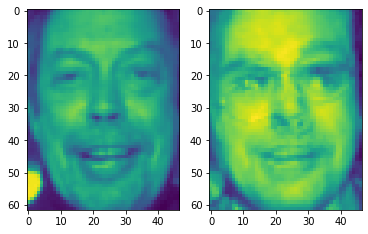

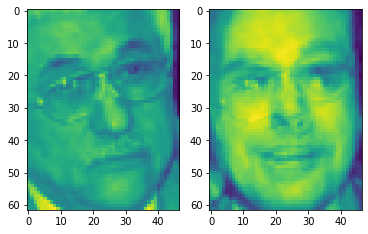

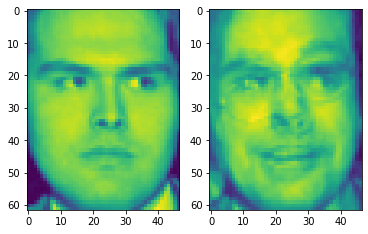

(3, 2914)
For k =  100 



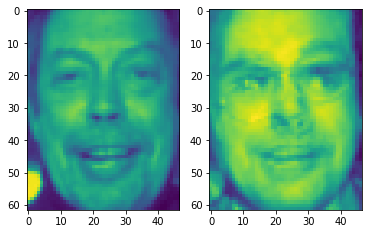

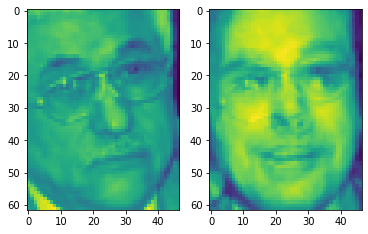

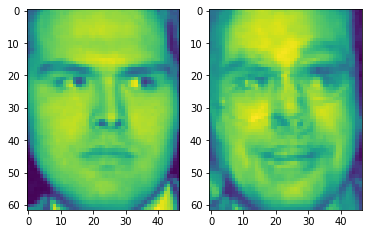

In [25]:
k_components = [5,10,50,100]

mu = np.mean(any3_faces, axis=0)

for k in k_components:

  Xhat = np.dot(pca.transform(any3_faces)[:,:k], pca.components_[:k,:])
  Xhat += mu
  print(Xhat.shape)
  print("For k = ", k, "\n")

  for i in range(len(Xhat)):
    img = np.split(any3_faces[i],62)
    img2 = np.split(Xhat[i], 62)
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(img)
    ax2.imshow(img2)
    plt.show()

### 6. Train a classifier on the images 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
#Training classification model on original image
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Confusion Matrix\n")
print(confusion_matrix(y_pred,y_test))
print("\nClassification Report\n")
print(classification_report(y_pred,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         0
          20       0.60      0.25      0.35        12
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          25       1.00      1.00      1.00         1
          26       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          36       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#Training classification on model with 175 principal components
n_components = 175

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
logreg.fit(X_train_pca,y_train)
y_pred_pca = logreg.predict(X_test_pca)
print("\nClassification Report\n")
print(classification_report(y_pred_pca,y_test))


Extracting the top 175 eigenfaces from 9924 faces


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Classification Report

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.40      0.33      0.36         6
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         0
   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparison : Classification with 175 principal components gives a better accuracy at 17% than classification on original image (16%) using logistic regression.  